In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the data
data = pd.read_csv('../data/merged_data.csv')
data['quarter'] = data['quarter'].astype(int)

# Create a new column 'Quarter' with unique values based on Year and quarter
data['Quarter'] = data['year'].astype(str) + '_Q' + data['quarter'].astype(str)

# Drop the 'Year' column
data.drop(columns=['year', 'quarter'], inplace=True)

# Select relevant columns for prediction
features = data[['borough', 'Quarter', 'good_job', 'trust', 'fair_treatment', 'dealing_issues',
                 'Outcome_A no further action disposal', 'Outcome_Arrest',
                 'Outcome_Caution (simple or conditional)', 'Outcome_Community resolution',
                 'Outcome_Penalty Notice for Disorder', 'Outcome_Summons / charged by post',
                 'Object of search_Anything to threaten or harm anyone', 
                 'Object of search_Articles for use in criminal damage',
                 'Object of search_Controlled drugs', 'Object of search_Firearms',
                 'Object of search_Fireworks', 'Object of search_Offensive weapons',
                 'Object of search_Stolen goods']]

# One-hot encode categorical variables (borough and Quarter)
features_encoded = pd.get_dummies(features, columns=['borough', 'Quarter'], drop_first=True)

# Split into features (X) and target (y)
X = features_encoded.drop(columns=['trust', 'good_job', 'fair_treatment', 'dealing_issues'])  # Drop the target and other indicators
y = features_encoded[['trust', 'good_job', 'fair_treatment', 'dealing_issues']]  # Select all indicators for trust and confidence

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [32]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer (1 neuron for regression)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Display the model architecture
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                3520      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MAE: {mae}")

# Predict on test data
y_pred = model.predict(X_test)


Epoch 1/50
14/14 [==============================] - 0s 8ms/step - loss: 1.5961 - mae: 1.0350 - val_loss: 0.3176 - val_mae: 0.4747
Epoch 2/50
14/14 [==============================] - 0s 3ms/step - loss: 0.4827 - mae: 0.5573 - val_loss: 0.1818 - val_mae: 0.3476
Epoch 3/50
14/14 [==============================] - 0s 3ms/step - loss: 0.3920 - mae: 0.4787 - val_loss: 0.1068 - val_mae: 0.2707
Epoch 4/50
14/14 [==============================] - 0s 3ms/step - loss: 0.2380 - mae: 0.3888 - val_loss: 0.0873 - val_mae: 0.2457
Epoch 5/50
14/14 [==============================] - 0s 3ms/step - loss: 0.2436 - mae: 0.3946 - val_loss: 0.0736 - val_mae: 0.2238
Epoch 6/50
14/14 [==============================] - 0s 3ms/step - loss: 0.2201 - mae: 0.3820 - val_loss: 0.0631 - val_mae: 0.2053
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1856 - mae: 0.3447 - val_loss: 0.0582 - val_mae: 0.1975
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1756 - mae: 0.32

In [46]:
model.save('../data/NN.keras')

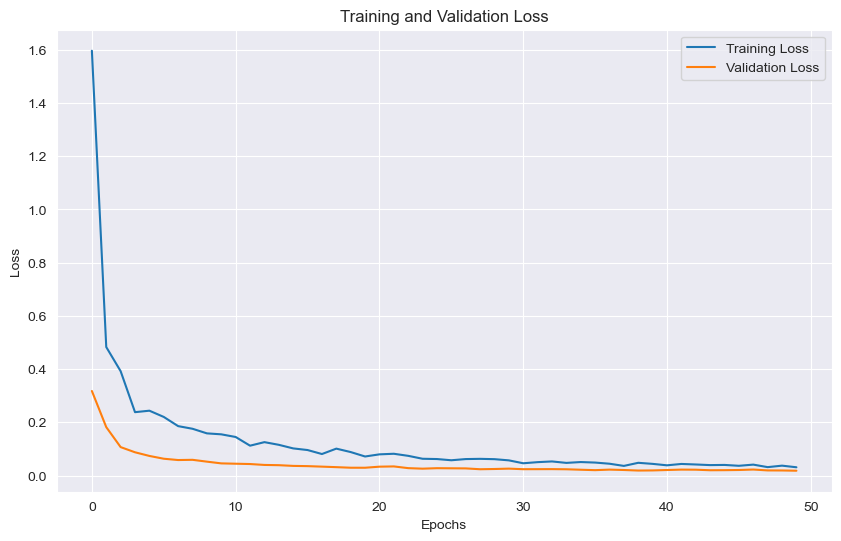

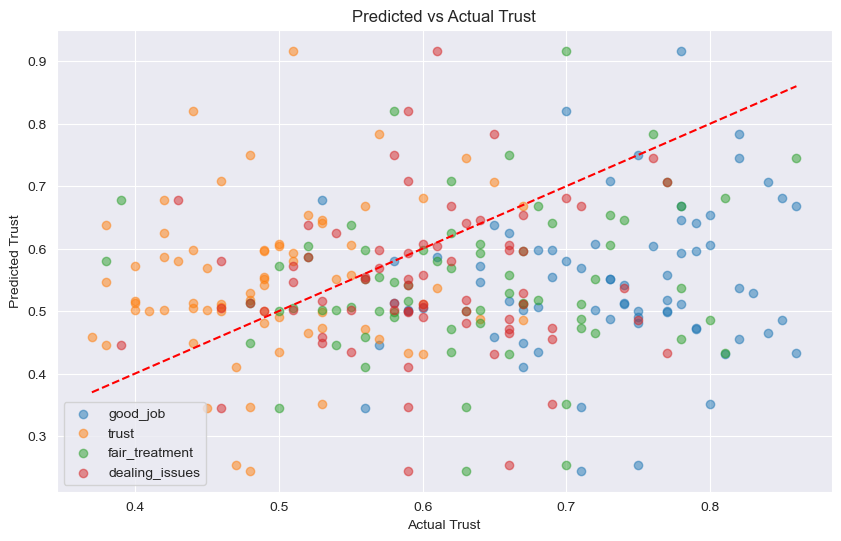

In [34]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Flatten y_test to compare each feature against y_pred
y_test_flattened = y_test.values.flatten()

feature_names = features_encoded.columns

# Plot predicted vs actual values for each feature in y_test
plt.figure(figsize=(10, 6))
for i in range(4):
    plt.scatter(y_test_flattened[i::4], y_pred.flatten(), alpha=0.5, label=f'{feature_names[i]}')

plt.plot([min(y_test_flattened), max(y_test_flattened)], [min(y_test_flattened), max(y_test_flattened)], '--', color='red')
plt.title('Predicted vs Actual Trust')
plt.xlabel('Actual Trust')
plt.ylabel('Predicted Trust')
plt.legend()
plt.grid(True)
plt.show()




In [60]:
print(y_pred)

[[0.5055469 ]
 [0.5062418 ]
 [0.49904817]
 [0.45549852]
 [0.59817576]
 [0.57969654]
 [0.66884446]
 [0.44820088]
 [0.34421515]
 [0.637109  ]
 [0.5164633 ]
 [0.48622715]
 [0.6774749 ]
 [0.51195973]
 [0.5132704 ]
 [0.4809696 ]
 [0.70714974]
 [0.5955553 ]
 [0.5018886 ]
 [0.50085944]
 [0.5722805 ]
 [0.5510096 ]
 [0.58591473]
 [0.7082966 ]
 [0.60498184]
 [0.5171029 ]
 [0.59817815]
 [0.24450502]
 [0.8195835 ]
 [0.62512887]
 [0.51074374]
 [0.74516135]
 [0.66794187]
 [0.43239897]
 [0.50152755]
 [0.49072182]
 [0.49968952]
 [0.5369762 ]
 [0.5516124 ]
 [0.43192112]
 [0.60696936]
 [0.4097479 ]
 [0.4878196 ]
 [0.50096655]
 [0.34657633]
 [0.5936021 ]
 [0.46502474]
 [0.5538442 ]
 [0.5570258 ]
 [0.7838991 ]
 [0.49978516]
 [0.9167791 ]
 [0.25327802]
 [0.43442753]
 [0.45860058]
 [0.6540434 ]
 [0.5282577 ]
 [0.47148037]
 [0.56953293]
 [0.54733145]
 [0.57942855]
 [0.68051326]
 [0.35072494]
 [0.74928004]
 [0.5420426 ]
 [0.47322416]
 [0.64151055]
 [0.60610485]
 [0.64660394]
 [0.51323074]
 [0.44593078]]


In [48]:
#!pip install tf-explain
#!pip install innvestigate
!pip install opencv-python

                                              0.0/38.8 MB ? eta -:--:--
                                              0.0/38.8 MB 1.3 MB/s eta 0:00:31
                                              0.0/38.8 MB 1.3 MB/s eta 0:00:31
                                              0.0/38.8 MB 1.3 MB/s eta 0:00:31
                                              0.3/38.8 MB 1.7 MB/s eta 0:00:23
                                              0.7/38.8 MB 3.1 MB/s eta 0:00:13
                                              0.8/38.8 MB 3.6 MB/s eta 0:00:11
                                              0.8/38.8 MB 3.6 MB/s eta 0:00:11
     -                                        1.1/38.8 MB 3.1 MB/s eta 0:00:13
     -                                        1.1/38.8 MB 3.1 MB/s eta 0:00:13
     -                                        1.1/38.8 MB 3.1 MB/s eta 0:00:13
     -                                        1.1/38.8 MB 3.1 MB/s eta 0:00:13
     -                                        1.2/38.8 MB 2

No data for borough Ealing
No data for borough Enfield
No data for borough Greenwich
No data for borough Hackney
No data for borough Hammersmith and Fulham
No data for borough Haringey
No data for borough Harrow
No data for borough Havering
No data for borough Hillingdon
No data for borough Hounslow
No data for borough Islington
No data for borough Kensington and Chelsea
No data for borough Kingston upon Thames
No data for borough Lambeth
No data for borough Lewisham
No data for borough Merton
No data for borough Newham
No data for borough Redbridge
No data for borough Richmond upon Thames
No data for borough Southwark
No data for borough Sutton
No data for borough Tower Hamlets
No data for borough Waltham Forest
No data for borough Wandsworth
No data for borough Westminster


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (32).

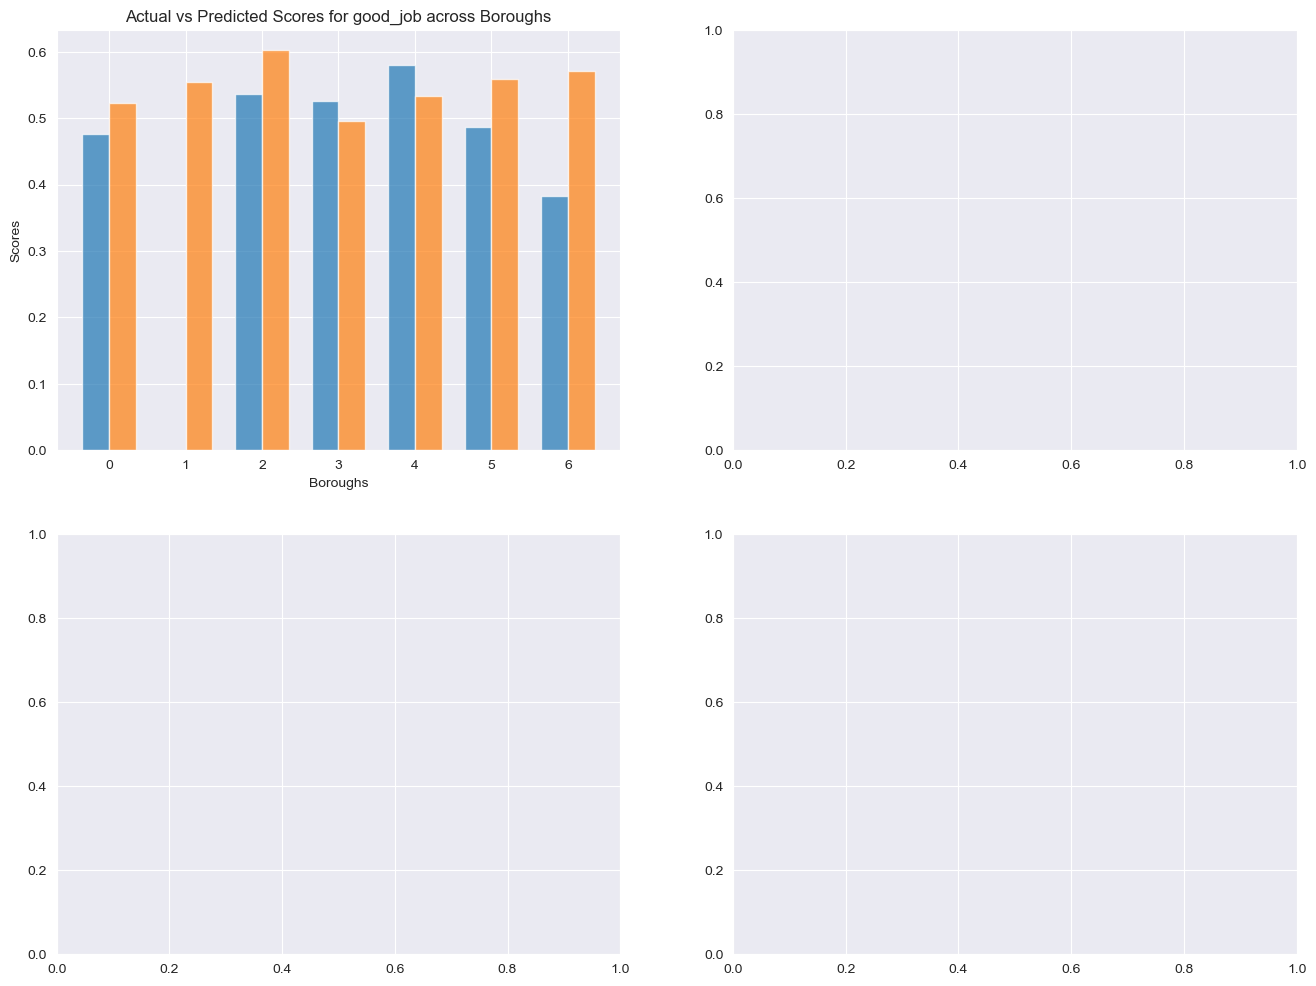

In [67]:
# Get unique boroughs
boroughs = data['borough'].unique()

# Initialize subplots for bar plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

# Plot actual vs predicted values for each feature in y_test
for i, feature in enumerate(feature_names):
    actual_values = []
    predicted_values = []
    
    for borough in boroughs:
        # Aggregate actual and predicted values for each borough
        actual_mean = y_test.loc[data['borough'] == borough, feature].mean()
        
        # Filter y_pred to match the same boroughs as in y_test
        borough_indices = data[data['borough'] == borough].index
        
        # Check if borough_indices are within the bounds of y_pred
        borough_indices = [idx for idx in borough_indices if idx < len(y_pred)]
        
        if not borough_indices:
            print(f"No data for borough {borough}")
            continue
        
        predicted_mean = np.mean(y_pred[borough_indices, i])
        
        actual_values.append(actual_mean)
        predicted_values.append(predicted_mean)

    # Convert lists to numpy arrays
    actual_values = np.array(actual_values)
    predicted_values = np.array(predicted_values)

    # Bar plot for actual vs predicted values across boroughs
    ax = axes[i]
    x = np.arange(len(actual_values))
    width = 0.35

    rects1 = ax.bar(x - width/2, actual_values, width, label='Actual', alpha=0.7)
    rects2 = ax.bar(x + width/2, predicted_values, width, label='Predicted', alpha=0.7)

    ax.set_xlabel('Boroughs')
    ax.set_ylabel('Scores')
    ax.set_title(f'Actual vs Predicted Scores for {feature} across Boroughs')
    ax.set_xticks(x)
    ax.set_xticklabels(boroughs, rotation=45)  # Set labels directly from boroughs
    ax.legend()

plt.tight_layout()
plt.show()

IndexError: index 1 is out of bounds for axis 1 with size 1

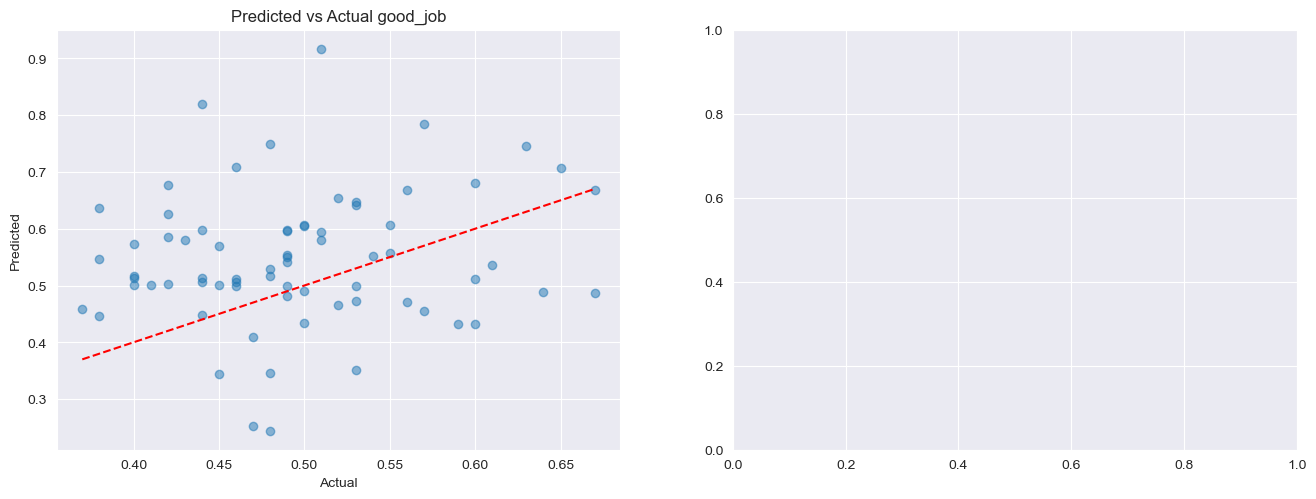

In [68]:
# Scatter plot for actual vs predicted values for each feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test[feature], y_pred[:, i], alpha=0.5)
    plt.plot([min(y_test[feature]), max(y_test[feature])], [min(y_test[feature]), max(y_test[feature])], '--', color='red')
    plt.title(f'Predicted vs Actual {feature}')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)

plt.tight_layout()
plt.show()